# The Bank Marketing Campaign (Final Project)


### Dataset information
- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required.


- **Target:** to predict if the customer is going to subscribe to term deposit.

<font color='red'>
Import Required Packages
</font>

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

<font color='red'>
Read The Dataset
</font>

In [94]:
ds = pd.read_csv('Data/bank-additional-full.csv', sep=';')

### Data Dictionary

In [95]:
df = pd.DataFrame({
"Attribute Name": ["Age", "Job", "Marital", "Education", "Default", "Housing", "Loan", "Contact", "Month", "Day of Week", "Duration", "Campaign", "Pdays", "Previous", "Poutcome", "Emp.var.rate", "Cos.price.idx", "Cons.conf.idx", "Euribor3m", "Nr.employed", "y"],
"Description": ["It is age of client", "It is type of client’s job.",
"It is client’s marital status.", "What is the highest education of client?", "Does client has credit?", "Does client has housing loan?", "Does client has personal loan?",
"What is a contact communication type of client?",
"Last month of the year contracting to the client",
"Last day of the week contracting to the client?", "How long does it contact to the client?", "Number of contacts performed during campaign", "Number of days passed after last contacted", "Number of contacts performed before campaign",
"Outcome of the previous marketing campaign", "Employment variation rate",
"Consumer price index", "Consumer confidence index", "Euribor 3 month rate", "Number of employees", "Does the client has subscribed a term deposit?"],
"Type": ["Numeric", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Numeric", "Numeric", "Numeric", "Numeric", "Categorical", "Numeric", "Numeric", "Numeric", "Numeric", "Numeric", "Categorical"],
                  })
df.style.set_properties(**{'text-align': 'left'})

,Attribute Name,Description,Type
0,Age,It is age of client,Numeric
1,Job,It is type of client’s job.,Categorical
2,Marital,It is client’s marital status.,Categorical
3,Education,What is the highest education of client?,Categorical
4,Default,Does client has credit?,Categorical
5,Housing,Does client has housing loan?,Categorical
6,Loan,Does client has personal loan?,Categorical
7,Contact,What is a contact communication type of client?,Categorical
8,Month,Last month of the year contracting to the client,Categorical
9,Day of Week,Last day of the week contracting to the client?,Categorical


## Data cleansing

In [96]:
ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [97]:
ds.shape

(41188, 21)

In [98]:
ds.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

#### Checking Null Values

In [99]:
print(ds.isnull().any())

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


<font color='red'>
Checking for zero values in numeric attributes
</font>

In [100]:
print("The original dataset:",ds.shape)
nullage= (ds['age']==0)
print(nullage.value_counts())
print('\n')
nullage= (ds['duration']==0)
print(nullage.value_counts())


The original dataset: (41188, 21)
False    41188
Name: age, dtype: int64


False    41184
True         4
Name: duration, dtype: int64


<font color='red'>
Checking for unknown values in object attributes
</font>
<br>
According to the dataset source, missing attribute values coded with the "unknown" label

In [101]:
print("---- %s ---" % 'job'.upper())
print(ds['job'].value_counts())
print("-------")
print('\n')

print("---- %s ---" % 'marital'.upper())
print(ds['marital'].value_counts())
print("-------")
print('\n')

print("---- %s ---" % 'education'.upper())
print(ds['education'].value_counts())
print("-------")
print('\n')

print("---- %s ---" % 'default'.upper())
print(ds['default'].value_counts())
print("-------")
print('\n')

print("---- %s ---" % 'housing'.upper())
print(ds['housing'].value_counts())
print("-------")
print('\n')

print("---- %s ---" % 'loan'.upper())
print(ds['loan'].value_counts())
print("-------")
print('\n')

print("---- %s ---" % 'contact'.upper())
print(ds['contact'].value_counts())
print("-------")
print('\n')

print("---- %s ---" % 'month'.upper())
print(ds['month'].value_counts())
print("-------")
print('\n')

print("---- %s ---" % 'day_of_week'.upper())
print(ds['day_of_week'].value_counts())
print("-------")
print('\n')

print("---- %s ---" % 'poutcome'.upper())
print(ds['poutcome'].value_counts())
print("-------")
print('\n')

---- JOB ---
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-------


---- MARITAL ---
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-------


---- EDUCATION ---
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-------


---- DEFAULT ---
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
-------


---- HOUSING ---
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
-------


---- LOAN ---
no         33950
yes         6248

#### Drop Unknown Values

In [102]:
ds.drop(ds[ds["job"]=="unknown"].index, axis=0, inplace=True)
ds.drop(ds[ds["marital"]=="unknown"].index, axis=0, inplace=True)
ds.drop(ds[ds["housing"]=="unknown"].index, axis=0, inplace=True)
ds.drop(ds[ds["default"]=="unknown"].index, axis=0, inplace=True)
ds.drop(ds[ds["education"]=="unknown"].index, axis=0, inplace=True)

#### Reduce Categorical Attributes

In [103]:
## For Marital Attribute, convert divorced values to be single
ds["marital"] = ds["marital"].replace({"divorced": "single"})

## For Education Attribute, group “basic.4y”,“basic.9y”,“basic.6y”, and call them “basic”.

ds['education'] = ds["education"].replace({"basic.9y": "basic"})
ds['education'] = ds["education"].replace({"basic.6y": "basic"})
ds['education'] = ds["education"].replace({"basic.4y": "basic"})

In [104]:
variables = ['job', 'marital', 'education', 'default','housing','loan', 'contact', 'day_of_week','month', 'poutcome']
for i in variables:
    print("---- %s ---" % i.upper())
    print(ds[i].unique())

---- JOB ---
['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
---- MARITAL ---
['married' 'single']
---- EDUCATION ---
['basic' 'high.school' 'professional.course' 'university.degree'
 'illiterate']
---- DEFAULT ---
['no' 'yes']
---- HOUSING ---
['no' 'yes']
---- LOAN ---
['no' 'yes']
---- CONTACT ---
['telephone' 'cellular']
---- DAY_OF_WEEK ---
['mon' 'tue' 'wed' 'thu' 'fri']
---- MONTH ---
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
---- POUTCOME ---
['nonexistent' 'failure' 'success']


## Data exploration
- **Objective:** Exploration and understanding the dataset by loading the data in a pandas dataframe format for efficient handeling.

In [106]:
ds.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [146]:
ds['y'].value_counts()

0    26629
1     3859
Name: y, dtype: int64

In [108]:
ds.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38.838334,220.277555,2.593113,981.438282,0.148898,0.115690,93.552002,-40.714638,3.673637,5171.234293
yes,40.352682,530.028505,2.026950,783.088624,0.507385,-1.363281,93.325331,-39.826820,1.985306,5088.904172


In [85]:
dst.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,37.502645,257.752680,2.584560,949.883059,0.209292,-0.101444,93.504563,-40.302259,3.426136,5158.983088
blue-collar,38.082746,270.806998,2.446963,979.774428,0.149868,0.054159,93.589200,-41.689613,3.561205,5168.298305
entrepreneur,40.771663,255.478923,2.422717,979.229508,0.161593,0.036417,93.560829,-41.357845,3.671533,5171.477400
housemaid,44.441860,261.461538,2.484794,943.933810,0.177102,0.211807,93.612925,-39.449911,3.782753,5169.561538
management,41.487991,252.081878,2.396288,961.027838,0.187227,-0.102566,93.474271,-40.448035,3.536767,5164.155622
retired,63.032529,276.389297,2.373557,875.023085,0.386149,-1.070724,93.343368,-38.455299,2.367078,5104.281112
self-employed,38.792517,265.948980,2.619048,970.836735,0.156463,-0.062358,93.497770,-40.565079,3.545862,5165.651474
services,36.624508,267.357112,2.547046,974.204376,0.178556,0.031028,93.591255,-41.581619,3.539043,5165.719125
student,25.396341,283.447154,2.046748,843.652439,0.495935,-1.467480,93.305720,-40.359756,1.833122,5084.423984


In [109]:
ds.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic,41.390056,264.339590,2.477439,965.802113,0.173275,-0.042449,93.566152,-41.123207,3.482461,5162.473536
high.school,37.339914,264.854656,2.532926,959.024679,0.204442,-0.089570,93.550286,-41.018652,3.424706,5159.625653
illiterate,44.272727,241.727273,2.000000,999.000000,0.090909,-0.372727,93.170545,-40.054545,3.324182,5168.218182
professional.course,39.333025,252.957649,2.550104,956.745198,0.179357,0.056353,93.535274,-40.220273,3.582548,5164.998658
university.degree,38.324914,254.488475,2.535632,946.808010,0.209278,-0.133356,93.465672,-40.050960,3.417846,5158.664243


## Data Visualizations

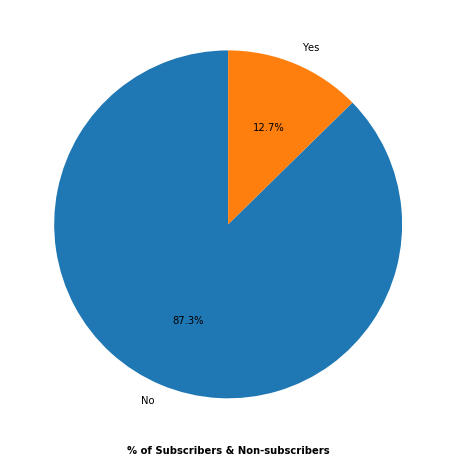

In [110]:

labels1 = 'No','Yes'
ds['y'].value_counts().plot(kind='pie',figsize=(20,8),labels=labels1, autopct='%1.1f%%',shadow=False, startangle=90).get_yaxis().set_visible(False)
plt.xticks(rotation=0);
plt.title("",fontweight='bold');
plt.xlabel("% of Subscribers & Non-subscribers", fontweight='bold');

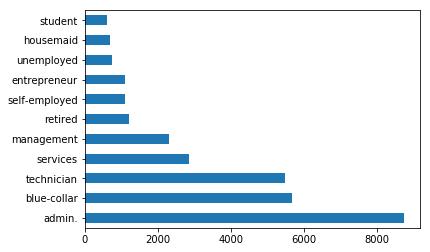

In [111]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
ds.job.value_counts().plot(kind='barh');

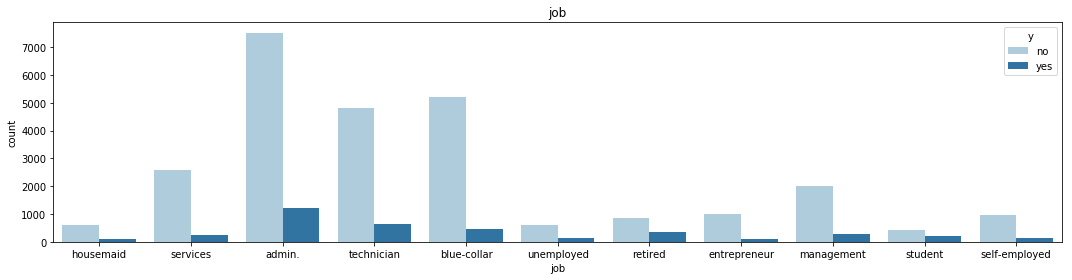

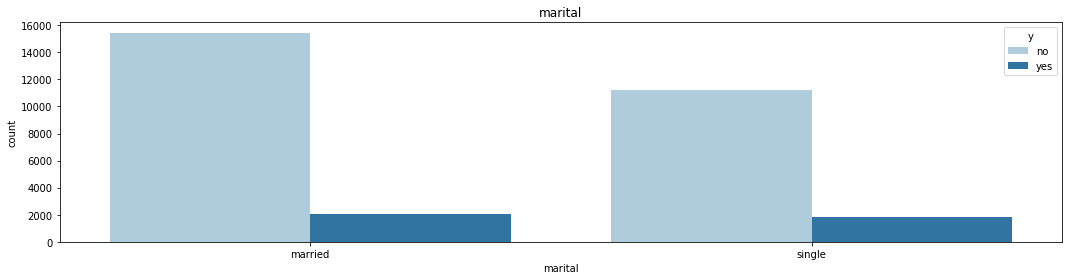

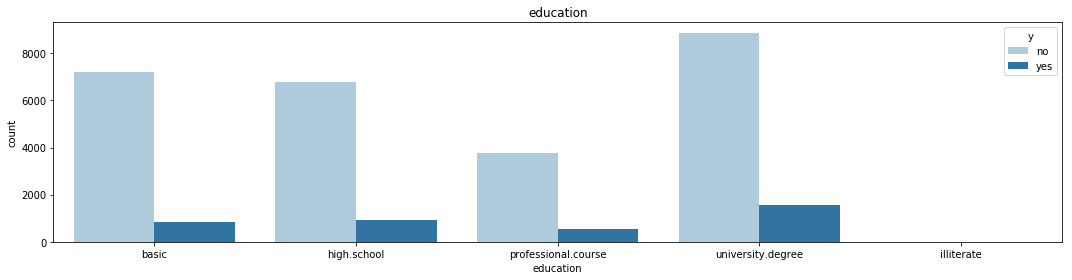

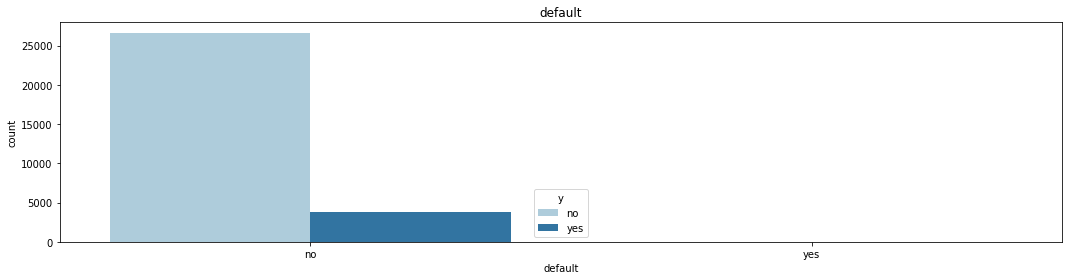

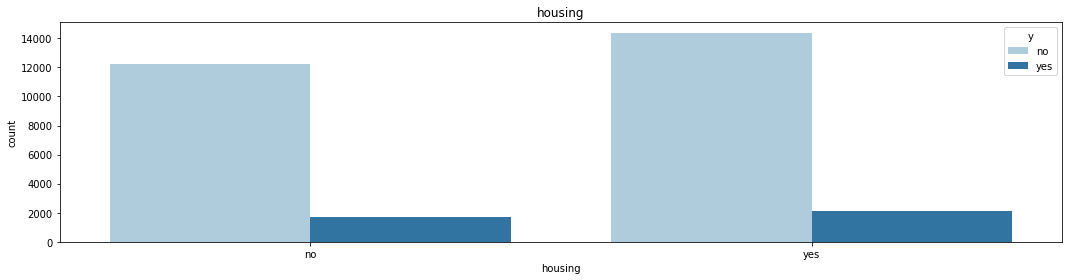

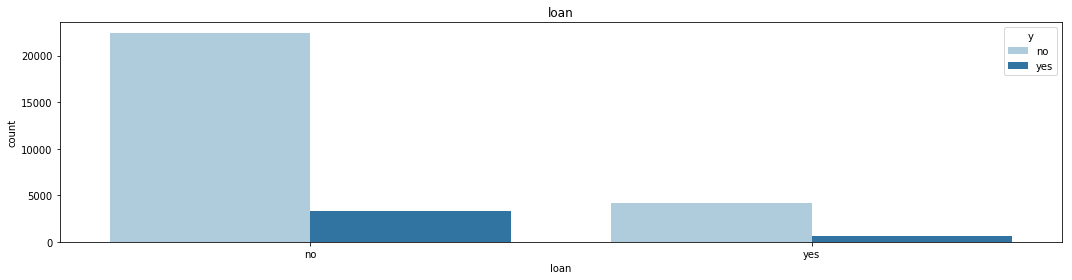

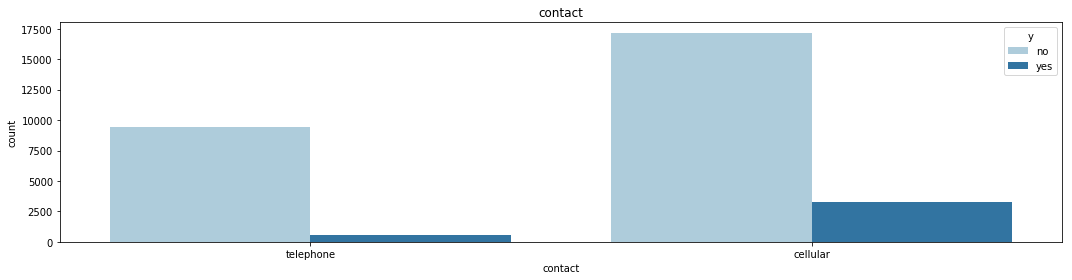

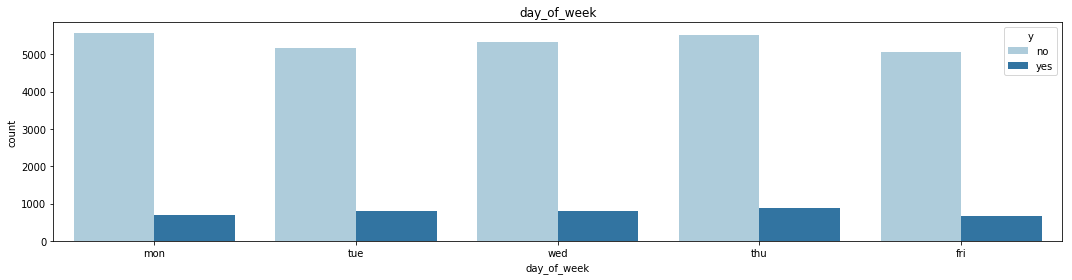

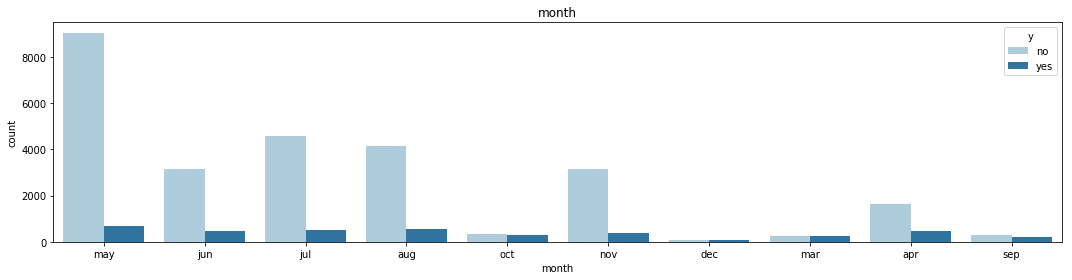

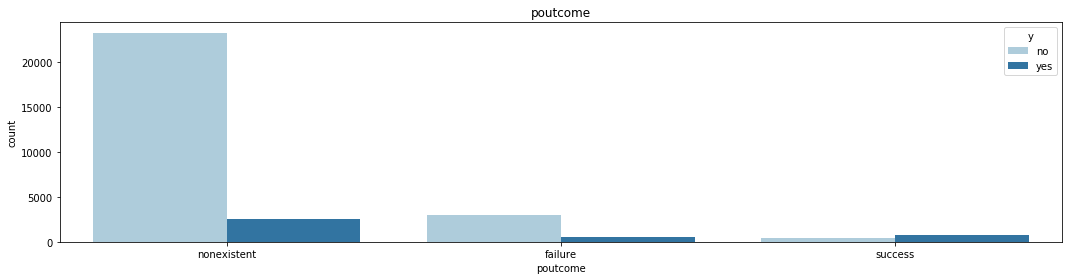

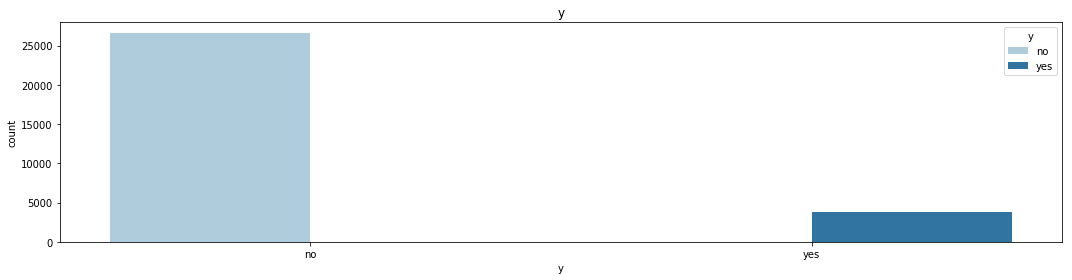

In [112]:
#distribution according different attributes
variables = ['job', 'marital', 'education', 'default','housing','loan', 'contact', 'day_of_week','month', 'poutcome','y']
for i in variables:
    plt.figure(figsize=(15,4))
    sns.countplot(ds[i], hue = ds["y"], palette = "Paired");
    plt.title(i)
    plt.tight_layout()

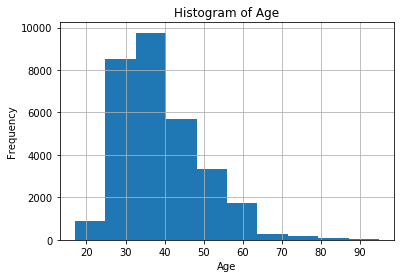

In [113]:
#
ds.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [165]:
##correlation
ds.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.007910,-0.002364,-0.050891,0.049231,-0.050409,-0.035762,0.125017,-0.036481,-0.064586,0.048727
duration,0.007910,1.000000,-0.068406,-0.046239,0.018772,-0.023374,0.012768,-0.009525,-0.028922,-0.040367,0.393530
campaign,-0.002364,-0.068406,1.000000,0.054312,-0.080766,0.157739,0.127260,-0.011664,0.140836,0.148069,-0.069206
pdays,-0.050891,-0.046239,0.054312,1.000000,-0.590248,0.268763,0.068010,-0.102368,0.295188,0.370845,-0.327509
previous,0.049231,0.018772,-0.080766,-0.590248,1.000000,-0.403502,-0.176775,-0.027930,-0.438863,-0.488365,0.228003
emp.var.rate,-0.050409,-0.023374,0.157739,0.268763,-0.403502,1.000000,0.766055,0.157593,0.969412,0.900390,-0.305365
cons.price.idx,-0.035762,0.012768,0.127260,0.068010,-0.176775,0.766055,1.000000,0.027217,0.667292,0.488871,-0.128752
cons.conf.idx,0.125017,-0.009525,-0.011664,-0.102368,-0.027930,0.157593,0.027217,1.000000,0.243637,0.075283,0.061638
euribor3m,-0.036481,-0.028922,0.140836,0.295188,-0.438863,0.969412,0.667292,0.243637,1.000000,0.944871,-0.315869
nr.employed,-0.064586,-0.040367,0.148069,0.370845,-0.488365,0.900390,0.488871,0.075283,0.944871,1.000000,-0.364230


## Observations:

1. **For y values**, we have imbalanced classes since the ration of non-subscribers to subscribers is about __87:13__
2. **For the age**, 
    - Most of the bank clients are aged between 30–40.
    - Most of the clients who subscribed to the deposit have a higher age average.
3. Job Title seems to have relation with deposit subscription
5. **Good Predictors (x features)**
    - Poutcome (Outcome of the previous marketing campaign)
    - Education
    - Month
    - job
    - ...

In [121]:
ds['y'] = ds['y'].replace('yes',1)
ds['y'] = ds['y'].replace('no',0)

### Features Selection

In [122]:
# creating the sub dataframe with only the features im using
features = ['age','job','marital','education','contact','month', 'poutcome', 'y']
# creating the sub dataframe with only the features im using
xfeatures =  ds[features]


### Create Dummy Variables

In [148]:
# md = ModelData.  Dummies ignores numeric columns such as age and y
Model = pd.get_dummies(xfeatures[['age','job','marital','education','contact','month', 'poutcome', 'y']], drop_first = True)

# no hyper parameters for first model
LogRegmodel = LogisticRegression()

# X and y features
X1 = Model.drop('y', axis =1)
y1 = Model['y']
Model.head()

,age,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,37,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
6,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Splitting Data
- Split the dataset into training and testing dataset by using **train_test_split** function which will help to split the data randomly.
- The training dataset contains **80%** of the original dataset, while the testing dataset is containing only **20%**.  

In [126]:
x_train, x_test, y_train, y_test = train_test_split(X1,y1, test_size=0.20)
print("The original dataset:",ds.shape)
print("The training dataset:",x_train.shape)
print("The testing dataset:",x_test.shape)

The original dataset: (30488, 21)
The training dataset: (24390, 28)
The testing dataset: (6098, 28)


In [140]:
# fit model
LogRegmodel.fit(x_train, y_train)

/Users/AL-GoThMi1/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [141]:
y_pred = LogRegmodel.predict(x_test)

#### Accuracy Score

In [142]:
#Out of all the classes, how much we predicted correctly
metrics.accuracy_score(y_test,y_pred)

0.8820924893407674

#### Confusion Matrix

In [143]:
metrics.confusion_matrix(y_test,y_pred)

array([[5244,   98],
       [ 621,  135]])

 True Negatives: **5244**
<br>
 False Negatives: **621**
<br>
 True Positives: **135**
<br>
 False Positives: **98**

#### ROC AUC

In [144]:
#ROC is a probability curve and AUC represents degree or measure of separability. 
#It tells how much model is capable of distinguishing between classes.
#AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier.
metrics.roc_auc_score(y_test,y_pred)

0.5801131197518319

#### Logarithmic loss

In [145]:
#measures the performance of a classification model where the prediction input is a probability value between 0 and 1
#A perfect model would have a log loss of 0. 
#Log loss increases as the predicted probability diverge from the actual label
metrics.log_loss(y_test,y_pred)

4.072393996144465

### work to be done 
#### Other measurements that need to be calculated + 
##### check for outliers
##### Resample the training set (Under-sampling _ Over-sampling)
##### Add  correlation matrix or heat map 
<img src="1.png" alt="Alt text that describes the graphic" title="Title text" />
<img src="2.png" alt="Alt text that describes the graphic" title="Title text" />
<img src="3.png" alt="Alt text that describes the graphic" title="Title text" />
<img src="5.png" alt="Alt text that describes the graphic" title="Title text" />